In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

from xgboost import XGBRegressor

# Sklearn preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, mutual_info_regression, VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error,root_mean_squared_log_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Load the dataset


df = pd.read_csv('/Users/peekaboo645/code/Peekaboo64534/project_name/CONSUMPTION_PREDICTION/final_dataset.csv')


In [7]:
# Define the needed columns
final_features = [
                    # 'datetime',
                    # 'homeid',
                    #'Gas (kWh)',
                    'Electricity (kWh)',
                    #'Total (kWh)',
                    'temp_mean',
                    'temp_min',
                    'temp_max',
                    # 'location_id',
                    # 'location_name',
                    'residents',
                    'hometype',
                    # 'occupied_days',
                    # 'occupied_nights',
                    'entry_floor',
                    'income_band_num',
                    'electric_appliance',
                    'gas_appliance',
                    'total_area',
                    'room_count',
                    'windowsopen',
                    'mean_h',
                    'min_h',
                    'max_h',
                     'mean_t',
                     'min_t',
                     'max_t',
                    'average_age_numeric',
                    'workstatus',
                    'total_participants']

df_final = df[final_features]

In [8]:
df_final

,Electricity (kWh),temp_mean,temp_min,temp_max,residents,hometype,entry_floor,income_band_num,electric_appliance,gas_appliance,...,windowsopen,mean_h,min_h,max_h,mean_t,min_t,max_t,average_age_numeric,workstatus,total_participants
0,3.725250,5.169474,2.9,6.9,1,house_or_bungalow,0,14,9,3,...,6,37.608684,30.0,48.2,16.689213,15.2,17.6,67.0,1.0,1
1,3.692155,3.996875,1.7,7.3,1,house_or_bungalow,0,14,9,3,...,6,34.672411,28.4,40.6,16.795971,15.3,17.6,67.0,1.0,1
2,3.922362,2.465625,-0.2,5.8,1,house_or_bungalow,0,14,9,3,...,6,33.099335,28.1,38.7,16.404040,14.2,17.7,67.0,1.0,1
3,4.658932,2.642708,-0.2,6.4,1,house_or_bungalow,0,14,9,3,...,6,33.380109,27.5,39.8,15.941472,13.6,18.1,67.0,1.0,1
4,3.894231,0.740625,-2.1,2.9,1,house_or_bungalow,0,14,9,3,...,6,28.455956,22.7,36.0,16.123227,14.8,17.4,67.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45110,15.034794,17.177083,10.3,24.0,3,flat,0,12,10,4,...,8,53.865820,46.1,61.7,19.769533,19.3,20.3,27.0,0.0,3
45111,11.688886,18.744792,11.9,28.4,3,flat,0,12,10,4,...,8,52.338076,45.3,57.9,20.579418,20.0,21.2,27.0,0.0,3
45112,11.550507,15.307292,11.8,22.2,3,flat,0,12,10,4,...,8,57.954409,54.2,63.6,20.893549,20.6,21.3,27.0,0.0,3
45113,10.084057,13.848958,12.8,16.4,3,flat,0,12,10,4,...,8,60.531336,59.4,64.6,21.095065,20.8,21.4,27.0,0.0,3


In [6]:
df

,datetime,homeid,Gas (kWh),Electricity (kWh),Total (kWh),temp_mean,temp_min,temp_max,location_id,location_name,...,windowsopen,mean_h,min_h,max_h,mean_t,min_t,max_t,average_age_numeric,workstatus,total_participants
0,2018-02-21,299,21.603,3.725250,25.328250,5.169474,2.9,6.9,1,Edinburgh,...,6,37.608684,30.0,48.2,16.689213,15.2,17.6,67.0,1.0,1
1,2018-02-22,299,23.288,3.692155,26.980155,3.996875,1.7,7.3,1,Edinburgh,...,6,34.672411,28.4,40.6,16.795971,15.3,17.6,67.0,1.0,1
2,2018-02-23,299,30.005,3.922362,33.927362,2.465625,-0.2,5.8,1,Edinburgh,...,6,33.099335,28.1,38.7,16.404040,14.2,17.7,67.0,1.0,1
3,2018-02-24,299,31.113,4.658932,35.771932,2.642708,-0.2,6.4,1,Edinburgh,...,6,33.380109,27.5,39.8,15.941472,13.6,18.1,67.0,1.0,1
4,2018-02-27,299,47.230,3.894231,51.124231,0.740625,-2.1,2.9,1,Edinburgh,...,6,28.455956,22.7,36.0,16.123227,14.8,17.4,67.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45110,2018-06-24,280,30.202,15.034794,45.236794,17.177083,10.3,24.0,1,Edinburgh,...,8,53.865820,46.1,61.7,19.769533,19.3,20.3,27.0,0.0,3
45111,2018-06-25,280,19.008,11.688886,30.696886,18.744792,11.9,28.4,1,Edinburgh,...,8,52.338076,45.3,57.9,20.579418,20.0,21.2,27.0,0.0,3
45112,2018-06-26,280,20.690,11.550507,32.240507,15.307292,11.8,22.2,1,Edinburgh,...,8,57.954409,54.2,63.6,20.893549,20.6,21.3,27.0,0.0,3
45113,2018-06-29,280,12.190,10.084057,22.274057,13.848958,12.8,16.4,1,Edinburgh,...,8,60.531336,59.4,64.6,21.095065,20.8,21.4,27.0,0.0,3


In [10]:
# Show categorical columns
df_final.select_dtypes(include=['object'])

,hometype
0,house_or_bungalow
1,house_or_bungalow
2,house_or_bungalow
3,house_or_bungalow
4,house_or_bungalow
...,...
45110,flat
45111,flat
45112,flat
45113,flat


In [12]:
# Show numerical columns
df_final.select_dtypes(include=['number'])

,Electricity (kWh),temp_mean,temp_min,temp_max,residents,entry_floor,income_band_num,electric_appliance,gas_appliance,total_area,...,windowsopen,mean_h,min_h,max_h,mean_t,min_t,max_t,average_age_numeric,workstatus,total_participants
0,3.725250,5.169474,2.9,6.9,1,0,14,9,3,695,...,6,37.608684,30.0,48.2,16.689213,15.2,17.6,67.0,1.0,1
1,3.692155,3.996875,1.7,7.3,1,0,14,9,3,695,...,6,34.672411,28.4,40.6,16.795971,15.3,17.6,67.0,1.0,1
2,3.922362,2.465625,-0.2,5.8,1,0,14,9,3,695,...,6,33.099335,28.1,38.7,16.404040,14.2,17.7,67.0,1.0,1
3,4.658932,2.642708,-0.2,6.4,1,0,14,9,3,695,...,6,33.380109,27.5,39.8,15.941472,13.6,18.1,67.0,1.0,1
4,3.894231,0.740625,-2.1,2.9,1,0,14,9,3,695,...,6,28.455956,22.7,36.0,16.123227,14.8,17.4,67.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45110,15.034794,17.177083,10.3,24.0,3,0,12,10,4,1135,...,8,53.865820,46.1,61.7,19.769533,19.3,20.3,27.0,0.0,3
45111,11.688886,18.744792,11.9,28.4,3,0,12,10,4,1135,...,8,52.338076,45.3,57.9,20.579418,20.0,21.2,27.0,0.0,3
45112,11.550507,15.307292,11.8,22.2,3,0,12,10,4,1135,...,8,57.954409,54.2,63.6,20.893549,20.6,21.3,27.0,0.0,3
45113,10.084057,13.848958,12.8,16.4,3,0,12,10,4,1135,...,8,60.531336,59.4,64.6,21.095065,20.8,21.4,27.0,0.0,3


In [14]:
# Create columns selectors for preprocessing
num_col = make_column_selector(dtype_include=['float64','int64'])
cat_col = make_column_selector(dtype_exclude=['float64','int64'])

# Preprocessor
num_transformer = make_pipeline(SimpleImputer(strategy='mean'), RobustScaler())
cat_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'),OrdinalEncoder())

preproc_baseline = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col),
    remainder='drop')

In [15]:
preproc_baseline

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1365de440>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13767f9a0>)])

In [16]:
# Define X and y
X = df_final.drop(columns=['Electricity (kWh)']).copy()
y = df_final['Electricity (kWh)'].copy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor
preproc_data = pd.DataFrame(preproc_baseline.fit_transform(X_train))

In [17]:
X

,temp_mean,temp_min,temp_max,residents,hometype,entry_floor,income_band_num,electric_appliance,gas_appliance,total_area,...,windowsopen,mean_h,min_h,max_h,mean_t,min_t,max_t,average_age_numeric,workstatus,total_participants
0,5.169474,2.9,6.9,1,house_or_bungalow,0,14,9,3,695,...,6,37.608684,30.0,48.2,16.689213,15.2,17.6,67.0,1.0,1
1,3.996875,1.7,7.3,1,house_or_bungalow,0,14,9,3,695,...,6,34.672411,28.4,40.6,16.795971,15.3,17.6,67.0,1.0,1
2,2.465625,-0.2,5.8,1,house_or_bungalow,0,14,9,3,695,...,6,33.099335,28.1,38.7,16.404040,14.2,17.7,67.0,1.0,1
3,2.642708,-0.2,6.4,1,house_or_bungalow,0,14,9,3,695,...,6,33.380109,27.5,39.8,15.941472,13.6,18.1,67.0,1.0,1
4,0.740625,-2.1,2.9,1,house_or_bungalow,0,14,9,3,695,...,6,28.455956,22.7,36.0,16.123227,14.8,17.4,67.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45110,17.177083,10.3,24.0,3,flat,0,12,10,4,1135,...,8,53.865820,46.1,61.7,19.769533,19.3,20.3,27.0,0.0,3
45111,18.744792,11.9,28.4,3,flat,0,12,10,4,1135,...,8,52.338076,45.3,57.9,20.579418,20.0,21.2,27.0,0.0,3
45112,15.307292,11.8,22.2,3,flat,0,12,10,4,1135,...,8,57.954409,54.2,63.6,20.893549,20.6,21.3,27.0,0.0,3
45113,13.848958,12.8,16.4,3,flat,0,12,10,4,1135,...,8,60.531336,59.4,64.6,21.095065,20.8,21.4,27.0,0.0,3


In [18]:
y

0         3.725250
1         3.692155
2         3.922362
3         4.658932
4         3.894231
           ...    
45110    15.034794
45111    11.688886
45112    11.550507
45113    10.084057
45114     8.060609
Name: Electricity (kWh), Length: 45115, dtype: float64

In [19]:
preproc_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.359208,-0.417722,-0.30,0.0,1.0,0.000000,0.5,-1.0,0.410959,0.000000,...,1.015311,1.021127,0.718121,-1.724663,-1.285714,-1.96875,0.481481,0.00,0.0,0.0
1,0.469387,0.405063,0.60,2.0,0.0,0.000000,0.5,-1.0,0.890411,1.000000,...,0.295550,0.021127,0.067114,0.524581,0.400000,0.65625,-0.074074,0.00,2.0,1.0
2,1.323902,0.746835,1.67,0.0,0.0,1.666667,1.0,-1.0,-0.356164,-0.333333,...,0.802333,0.711268,0.744966,0.625827,0.485714,0.87500,0.037037,0.00,0.0,0.0
3,-0.175501,-0.050633,-0.18,2.0,0.0,-0.166667,-0.5,-2.0,2.657534,1.333333,...,-0.086464,0.014085,-0.255034,-1.039480,-1.714286,-0.59375,-0.074074,0.00,2.0,0.0
4,-0.538616,-0.417722,-0.59,2.0,0.0,1.000000,-2.5,1.0,-0.013699,0.333333,...,-0.180419,-0.274648,0.959732,-0.940357,-0.742857,-1.15625,0.203704,0.25,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36087,-0.342486,-0.113924,-0.45,0.0,1.0,0.333333,0.0,-1.0,-0.986301,-1.000000,...,-0.452780,-0.514085,-0.221477,-0.038931,0.085714,-0.18750,-0.074074,0.00,1.0,0.0
36088,-0.383097,-0.607595,-0.33,1.0,0.0,1.666667,1.0,-1.0,-0.095890,0.333333,...,-0.173144,-0.295775,-0.248322,-0.084456,-0.142857,-0.06250,-0.148148,0.00,1.0,1.0
36089,-0.452217,-0.455696,-0.38,2.0,0.0,-0.166667,-0.5,-2.0,2.657534,1.333333,...,-0.304962,-0.190141,-0.463087,-0.437530,-1.171429,-0.34375,-0.074074,0.00,2.0,0.0
36090,-1.251513,-1.240506,-1.02,1.0,0.0,-0.500000,-0.5,-1.0,-0.054795,0.333333,...,-0.837209,-0.788732,-1.000000,0.527435,-0.342857,1.06250,0.148148,0.00,1.0,1.0


In [20]:
tree_reg = DecisionTreeRegressor()

# Add estimator
pipe_baseline = make_pipeline(preproc_baseline, tree_reg)
pipe_baseline

score_baseline = cross_val_score(pipe_baseline,X_train,y_train, cv=5).mean()
score_baseline

0.3906360962116485

In [21]:
# Option 1: XGB regressor
xgb_reg = XGBRegressor()

# Add estimator
pipe_xgb = make_pipeline(preproc_baseline, xgb_reg)

# Score of the model
cross_val_score(pipe_xgb,X_train,y_train, scoring = 'r2', cv=5).mean()

0.6900824652601514

In [24]:
mean_absolute_percentage_error(y_test, y_pred)*100

26.992047122379997

In [25]:
pipe_xgb.fit(X_train, y_train)
y_pred_xgboost = pipe_xgb.predict(X_test)


<Axes: xlabel='Electricity (kWh)'>

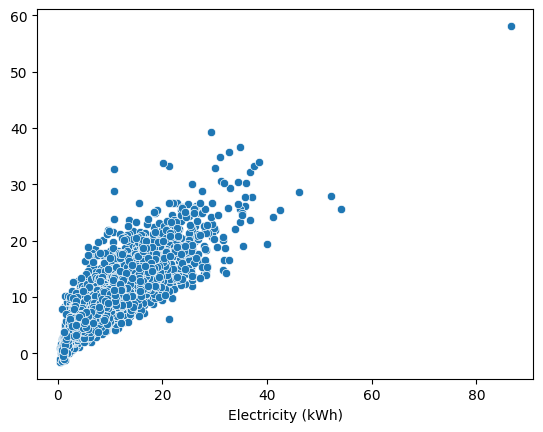

In [26]:
import seaborn as sns
sns.scatterplot(x=y_test,y=y_pred_xgboost)

In [27]:
len(y_pred_xgboost), len(y_test)

(9023, 9023)